In [1]:
# Standard stuff
import numpy as np                              #For almost everything
import matplotlib.pyplot as plt                 #For plotting
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pdf import PdfPages       #For saving figures to single pdf
figlist = []

#*******************************************************************************************************
#Setting RC Parameters for figure size and fontsizes
import matplotlib.pylab as pylab                           
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (20, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
#********************************************************************************************************

# Import pyliso tools
from pyliso import Circuit, save, load
from plotting import plotTF, plotTFs
import copy

mList = ['.',',','o','v','^','<','>','8','s','p','P','*','h','H','+','x','X','D','d','|','_']
cList = ['b','g','r','c','m','y','k']

In [2]:
AD602 = Circuit()
AD602.parseFil('AD602.fil')
fflow = 1
ffhigh = 1.0e7
numPoints = 7000

########################
#   Parsing complete   #
########################
()


In [11]:
def AD602gain(Cir,name,G=None,Vg=None):
    if G is None:
        if Vg is None:
            print('Error: Provide gain in dB or gain setting voltage in V.')
            print('Nothing changed.')
            return 0
        else:
            G = 32.0*Vg + 10.0
    if G>30.0 or G<-10.0:
        print('Error: Gain can be set between -10dB to 30 dB only.')
        print('Nothing changed.')
        return 0
    r1 = 100.0 - (10**(G/20.0))/0.357
    r2 = 100.0 - r1
    Cir.parts['AD602'+name+'rg1'].value=r1
    Cir.parts['AD602'+name+'rg2'].value=r2
    print('Gain set to '+str(np.round(G,2))+' dB.')

In [13]:
AD602gain(AD602,'u2a',G=15)

Gain set to 15 dB.


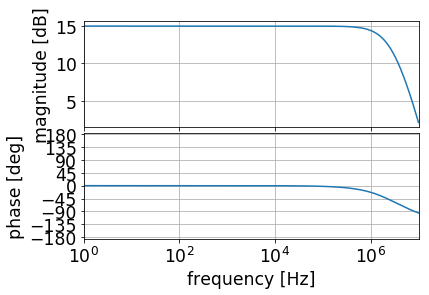

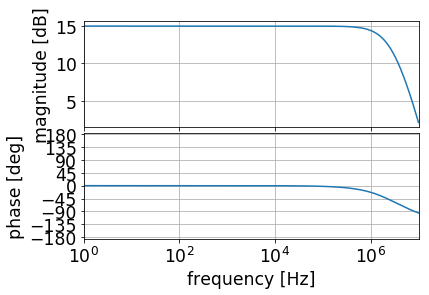

In [14]:
AD602.computeTF('AD602u2aIN','AD602u2aOUT', fflow, ffhigh, numPoints)
AD602.plotTF(dB=True)